In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split


In [20]:
import pandas as pd
df = pd.DataFrame({'A': ['one', 'one', 'two', 'two', 'one'] ,
                   'B': ['Ar', 'Br', 'Cr', 'Ar','Ar'] ,
                   'C': ['04/26/2022', '04/25/2022', '08/30/2015', '07/3/1999','02/03/2022' ],
                      'D':[1,7,3,4,5]})
df


,A,B,C,D
0,one,Ar,04/26/2022,1
1,one,Br,04/25/2022,7
2,two,Cr,08/30/2015,3
3,two,Ar,07/3/1999,4
4,one,Ar,02/03/2022,5


In [413]:
from datetime import date
from datetime import datetime

def test(x):
    # for i,j,k,l in x.values:
    #     x['D'] = x['C'].day_of_year
    x['D'] = x['C'].dt.day_of_year
    return x

In [21]:
df = df.groupby('A', group_keys=True).apply(lambda x: x.sort_values('C', ascending=False)).reset_index(drop=True)
# xxx = df.groupby('A', group_keys=False).apply(test)
df

,A,B,C,D
0,one,Ar,04/26/2022,1
1,one,Br,04/25/2022,7
2,one,Ar,02/03/2022,5
3,two,Cr,08/30/2015,3
4,two,Ar,07/3/1999,4


# Start

In [155]:
action_df = pd.read_csv("dataset/actions.csv").dropna()
action_df.columns = ['account_id', 'book_id', 'creation_date']
action_df['creation_date'] = pd.to_datetime(action_df['creation_date']).dt.date
action_df

,account_id,book_id,creation_date
0,15548,9819,2022-01-02
1,10982,87139,2022-01-02
2,10982,87138,2022-01-02
3,10982,88465,2022-01-02
4,33041,68008,2022-01-02
...,...,...,...
1048570,46160,86053,2022-02-04
1048571,14652,26357,2022-02-04
1048572,71296,72107,2022-02-04
1048573,125340,115659,2022-02-04


In [156]:
action_df = action_df.groupby('account_id', group_keys=True).apply(lambda x: x.sort_values('creation_date', ascending=False)).reset_index(drop=True)

In [157]:
action_df = action_df[pd.to_datetime(action_df['creation_date']).dt.year == 2022]

In [158]:
action_df['score'] = 5
previous_id = None
previous_day = None
previous_idx = None
for index, row in action_df.iterrows():
    current_id = row['account_id']
    if previous_id != current_id:
        previous_idx = None
    current_day = pd.to_datetime(row['creation_date']).day_of_year
    if current_id == previous_id and current_day <= previous_day:
        if previous_idx == None:
            action_df.at[index, 'score'] = action_df.at[index, 'score'] - (previous_day-current_day)//29
        else:
            action_df.at[index, 'score'] = action_df.at[previous_idx, 'score'] - (previous_day-current_day)//29
        previous_idx = index
    previous_id = current_id
    previous_day = current_day

In [159]:
action_df.to_csv('dataset/action-pre.csv', index=False)

## Pre-process

In [3]:
action_df = pd.read_csv("dataset/action-pre.csv").dropna()
action_df

,account_id,book_id,creation_date,score
0,0,101254,2022-03-20,5
1,0,110668,2022-01-21,3
2,1,120582,2022-04-26,5
3,1,111497,2022-03-18,4
4,1,110483,2022-02-24,4
...,...,...,...,...
1046128,149086,54928,2022-04-26,5
1046129,149087,93140,2022-04-26,5
1046130,149088,77549,2022-04-26,5
1046131,149089,15114,2022-04-26,5


In [4]:
book_df = pd.read_csv("dataset/book_data.csv")
rating_mean = book_df['rating'].mean()
book_df['rating'] = book_df['rating'].fillna(value=rating_mean)


In [5]:
merge_df = action_df.merge(book_df, on='book_id', how='inner')

In [6]:
merge_df['rating_count'] = merge_df.groupby('account_id')['book_id'].transform('count')
merge_df

,account_id,book_id,creation_date,score,title,description,price,number_of_page,PhysicalPrice,publishDate,rating,publisher,categories,author_name,translator_name,lang,rating_count
0,1,37715,2022-02-24,4,اومون را,«اومون را» اولین رمان ویکتور اولگویچ پلوین (۱۹...,10800,174,18000,1393/05/16,3.500000,نشر چشمه,رمان,پیمان خاکسار,ویکتور پلوین,En,2
1,295,37715,2022-02-25,5,اومون را,«اومون را» اولین رمان ویکتور اولگویچ پلوین (۱۹...,10800,174,18000,1393/05/16,3.500000,نشر چشمه,رمان,پیمان خاکسار,ویکتور پلوین,En,49
2,1023,37715,2022-02-24,5,اومون را,«اومون را» اولین رمان ویکتور اولگویچ پلوین (۱۹...,10800,174,18000,1393/05/16,3.500000,نشر چشمه,رمان,پیمان خاکسار,ویکتور پلوین,En,18
3,1377,37715,2022-02-26,5,اومون را,«اومون را» اولین رمان ویکتور اولگویچ پلوین (۱۹...,10800,174,18000,1393/05/16,3.500000,نشر چشمه,رمان,پیمان خاکسار,ویکتور پلوین,En,23
4,6530,37715,2022-02-25,5,اومون را,«اومون را» اولین رمان ویکتور اولگویچ پلوین (۱۹...,10800,174,18000,1393/05/16,3.500000,نشر چشمه,رمان,پیمان خاکسار,ویکتور پلوین,En,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279129,148555,14432,2022-04-25,5,نیستان و سینما: تصویرگرایی سینمایی در مثنوی مولوی,«نیستان و سینما» نوشته فریده صدائی(-۱۳۵۶) است ...,10000,414,25000,1395/07/01,3.992425,شرکت سهامی انتشار,پژوهش ادبی,فریده صدائی,NaN,Fa,2
279130,148775,248,2022-04-25,5,سیصد ضد سیصد: مروری بر روابط ایران و یونان از ...,اثر حاضر با هدف آشنایی جوانان با دوره‏ای از تا...,900,64,0,1387/10/05,3.500000,انتشارات مهرراوش,تاریخ ایران,صادق حیدری نیا,NaN,Fa,14
279131,148933,35488,2022-04-26,5,مرگ مثل رودخانه است,«مرگ مثل رودخانه است» دفتر شعری از هادی خورشاه...,900,77,0,1392/07/07,4.000000,نشر داستان,شعر معاصر,هادی خورشاهیان,NaN,Fa,5
279132,149083,25871,2022-04-26,5,بازاریابی در خرطوم فیل,«بازاریابی در خرطوم فیل» کتابی نوشته حسین مجدف...,0,36,0,NaN,3.000000,ناشر مؤلف,مدیریت و کسب و کار,حسین مجدفر,NaN,Fa,60


In [7]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("HooshvareLab/bert-base-parsbert-uncased")
feature_encodings = tokenizer(merge_df['categories'].tolist(), truncation=True, padding=True, max_length=64)


In [8]:
data_df = pd.concat([merge_df[['account_id', 'book_id','creation_date', 'score', 'price', 'number_of_page',
                    'PhysicalPrice', 'rating', 'rating_count', ]],
                    pd.DataFrame(feature_encodings['input_ids'])], axis=1)

In [25]:
data_df

,account_id,book_id,creation_date,score,price,number_of_page,PhysicalPrice,rating,rating_count,0,1,2,3,4,5,6,7,8
0,1,37715,2022-02-24,4,10800,174,18000,3.500000,2,2,8212,4,0,0,0,0,0,0
1,295,37715,2022-02-25,5,10800,174,18000,3.500000,49,2,8212,4,0,0,0,0,0,0
2,1023,37715,2022-02-24,5,10800,174,18000,3.500000,18,2,8212,4,0,0,0,0,0,0
3,1377,37715,2022-02-26,5,10800,174,18000,3.500000,23,2,8212,4,0,0,0,0,0,0
4,6530,37715,2022-02-25,5,10800,174,18000,3.500000,81,2,8212,4,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279129,148555,14432,2022-04-25,5,10000,414,25000,3.992425,2,2,4513,5193,4,0,0,0,0,0
279130,148775,248,2022-04-25,5,900,64,0,3.500000,14,2,2251,2119,4,0,0,0,0,0
279131,148933,35488,2022-04-26,5,900,77,0,4.000000,5,2,6138,8761,4,0,0,0,0,0
279132,149083,25871,2022-04-26,5,0,36,0,3.000000,60,2,2856,331,3161,331,2109,4,0,0


In [9]:
train, test = train_test_split(data_df, test_size=0.2, random_state=42)
train = train.sort_values('account_id').reset_index(drop=True)
test = test.sort_values('account_id').reset_index(drop=True)

In [10]:
train_query = train['account_id'].value_counts().sort_index()
test_query = test['account_id'].value_counts().sort_index()

In [11]:
features = [i for i in train.columns.to_list() if i not in ['account_id','book_id','creation_date','score'] ]
target = 'score'

In [12]:
import xgboost as xgb
model = xgb.XGBRanker(objective='rank:pairwise', n_estimators=100, random_state=0,learning_rate=0.01)
model.fit(
    train[features],
    train[target],
    group=train_query,
    eval_metric='ndcg',
    eval_set=[(test[features], test[target])],
    eval_group=[list(test_query)],
    verbose =True
)

# model.fit(ratings[['account_id','book_id']], ratings['rating'], group=ratings['count'].to_list(), verbose=True)

[0]	validation_0-ndcg:0.99650


/home/abolfazl/.local/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[1]	validation_0-ndcg:0.99647
[2]	validation_0-ndcg:0.99647
[3]	validation_0-ndcg:0.99652
[4]	validation_0-ndcg:0.99651
[5]	validation_0-ndcg:0.99652
[6]	validation_0-ndcg:0.99655
[7]	validation_0-ndcg:0.99653
[8]	validation_0-ndcg:0.99653
[9]	validation_0-ndcg:0.99649
[10]	validation_0-ndcg:0.99648
[11]	validation_0-ndcg:0.99648
[12]	validation_0-ndcg:0.99645
[13]	validation_0-ndcg:0.99652
[14]	validation_0-ndcg:0.99651
[15]	validation_0-ndcg:0.99649
[16]	validation_0-ndcg:0.99653
[17]	validation_0-ndcg:0.99654
[18]	validation_0-ndcg:0.99655
[19]	validation_0-ndcg:0.99653
[20]	validation_0-ndcg:0.99651
[21]	validation_0-ndcg:0.99650
[22]	validation_0-ndcg:0.99650
[23]	validation_0-ndcg:0.99650
[24]	validation_0-ndcg:0.99652
[25]	validation_0-ndcg:0.99653
[26]	validation_0-ndcg:0.99652
[27]	validation_0-ndcg:0.99650
[28]	validation_0-ndcg:0.99650
[29]	validation_0-ndcg:0.99650
[30]	validation_0-ndcg:0.99650
[31]	validation_0-ndcg:0.99648
[32]	validation_0-ndcg:0.99652
[33]	validation_0

XGBRanker(base_score=None, booster=None, callbacks=None, colsample_bylevel=None,
          colsample_bynode=None, colsample_bytree=None,
          early_stopping_rounds=None, enable_categorical=False,
          eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
          grow_policy=None, importance_type=None, interaction_constraints=None,
          learning_rate=0.01, max_bin=None, max_cat_threshold=None,
          max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
          max_leaves=None, min_child_weight=None, missing=nan,
          monotone_constraints=None, n_estimators=100, n_jobs=None,
          num_parallel_tree=None, predictor=None, random_state=0, ...)

In [314]:
# import lightgbm as lgb

# best_params = {'lambda_l1': 5.124099884314463e-06, 'lambda_l2': 0.7009148647378165, 'max_depth': 6, 'num_leaves': 252, 'colsample_bytree': 0.49800901015869725, 'min_child_samples': 17}
# model = lgb.LGBMRanker(n_estimators=1000, **best_params, random_state=44)
# model.fit(
#     train[features],
#     train[target],
#     group=train_query,
#     eval_set=[(test[features], test[target])],
#     eval_group=[list(test_query)],
#     eval_at=[1, 3, 5, 10, 20],
# )

[LightGBM] [Warning] lambda_l2 is set=0.7009148647378165, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7009148647378165
[LightGBM] [Warning] lambda_l1 is set=5.124099884314463e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.124099884314463e-06
[LightGBM] [Warning] lambda_l2 is set=0.7009148647378165, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7009148647378165
[LightGBM] [Warning] lambda_l1 is set=5.124099884314463e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.124099884314463e-06
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008339 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1191
[LightGBM] [Info] Number of data points in the train set: 119555, number of used features: 13
[LightGBM] [Warning] lambda_l2 is set=0.7009148647378165, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.7009148647378165
[LightGBM] [Warning] lambda

LGBMRanker(colsample_bytree=0.49800901015869725,
           lambda_l1=5.124099884314463e-06, lambda_l2=0.7009148647378165,
           max_depth=6, min_child_samples=17, n_estimators=1000, num_leaves=252,
           random_state=44)

Text(0.5, 1.0, 'feature importance')

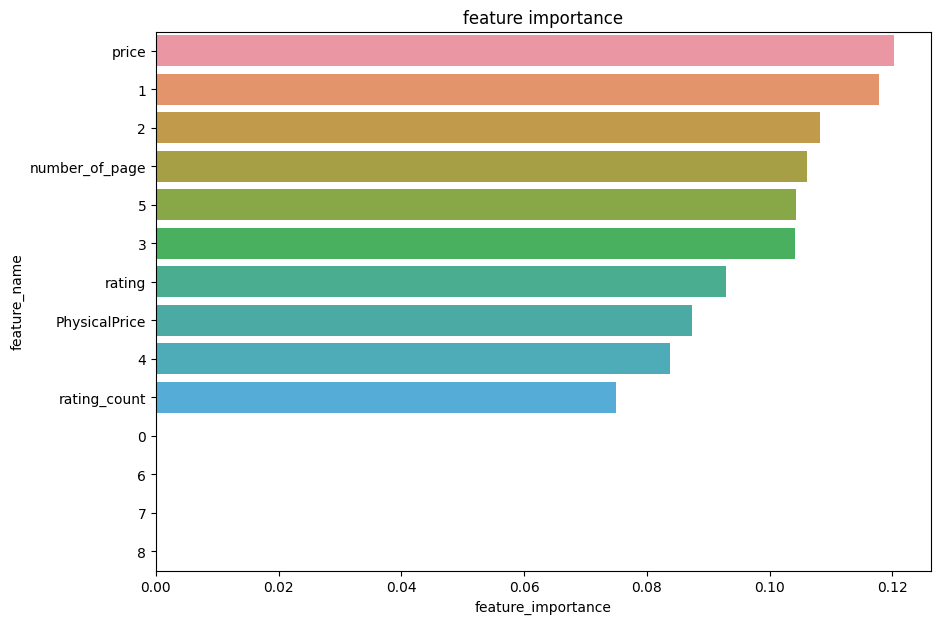

In [13]:
# feature imporance
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))
df_plt = pd.DataFrame({'feature_name': features, 'feature_importance': model.feature_importances_})
df_plt.sort_values('feature_importance', ascending=False, inplace=True)
sns.barplot(x="feature_importance", y="feature_name", data=df_plt)
plt.title('feature importance')

In [14]:
def preProcess(df):
    df['rating_count'] = df.groupby('account_id')['book_id'].transform('count')
    feature_encodings = tokenizer(df['categories'].tolist(), truncation=True, padding=True, max_length=64)
    data_df = pd.concat([df[['account_id', 'book_id', 'price', 'number_of_page',
                    'PhysicalPrice', 'rating', 'rating_count']],
                    pd.DataFrame(feature_encodings['input_ids'])], axis=1)
    
    fill_mat = pd.DataFrame(np.zeros((data_df.shape[0], 16 - data_df.shape[1]), dtype=np.int16), columns=range(data_df.shape[1]-7,9))    
    return pd.concat([data_df, fill_mat], axis=1)

In [75]:
user_id = 1234
book_list = [80387, 8213, 5331, 12439, 119985, 3619,37715]
data = pd.DataFrame({'account_id': [user_id] * len(book_list),
                     'book_id': book_list})
merge = data.merge(book_df, on='book_id', how='inner')
pred_df = preProcess(merge)
pred_df

,account_id,book_id,price,number_of_page,PhysicalPrice,rating,rating_count,0,1,2,3,4,5,6,7,8
0,1234,8213,8000,239,18000,2.963235,5,2,18200,4,0,0,0,0,0,0
1,1234,5331,9800,607,0,4.290598,5,2,8212,4,0,0,0,0,0,0
2,1234,12439,1200,120,3500,4.125000,5,2,5976,2471,4,0,0,0,0,0
3,1234,3619,8000,198,25000,3.000000,5,2,7854,6318,300,15985,22545,331,4648,4
4,1234,37715,10800,174,18000,3.500000,5,2,8212,4,0,0,0,0,0,0


In [76]:
preds = np.abs(model.predict(pred_df[features]))
# prob_scores = 1.0 - (preds / np.max(preds))
prob_scores = preds

topk_idx = np.argsort(prob_scores)[::-1]
recommend_df = pred_df.loc[topk_idx].reset_index(drop=True)

# check recommend
recom = []
print('---------- Recommend ----------')
for i, row in recommend_df.iterrows():
    recom.append({"rank":i+1,
                "book":book_df[book_df["book_id"] == row["book_id"]].to_dict(orient='records'),
                "score":prob_scores[topk_idx][i] })

---------- Recommend ----------


In [77]:
preds

array([0.44559845, 0.44645593, 0.5932432 , 0.5176903 , 0.450618  ],
      dtype=float32)

In [78]:
from sklearn.metrics import ndcg_score
x = pd.merge(pred_df, action_df.query('account_id==@user_id'), on=['account_id', 'book_id'], how='left').fillna(value=1)
true_relevance = np.asarray([x['score']])
scores = np.asarray([preds])
ndcg_score(true_relevance, scores)

0.9645423532825935

In [79]:
recom

[{'rank': 1,
  'book': [{'book_id': 12439,
    'title': 'من دیگر ما: جلد اول (مهارت\u200cهای تربیت فرزند در دنیای امروز)',
    'description': 'من دیگر ما نام مجموعه\u200cای نوشته\u200cی\xa0محسن عباسی ولدی است. این مجموعه با عنوان فرعی فرزند ما از ماجدا نیست؛ او خود ما است اما در اندازه\u200cای کوچک\u200cتر پیرامون پرورش و تربیت کودکان در خانواده است.\n\r\nجلد اول مجموعه من دیگر ما به مهارت\u200cهای تربیت فرزند در دنیای امروز\xa0می\u200cپردازد. \n\r\nدرباره\u200cی کتاب\xa0من دیگر ما\r\nمن دیگر ما، جلد اول مجموعه\u200cای تربیتی است. این مجموعه هفت جلد دارد که در هر کدام از آن\u200cها به یکی از مسائل مهم تربیتی مانند نقش محبت، آزادی، بازی کردن، تلویزیون دیدن و بازی\u200cهای رایانه\u200cای پرداخته است. جلد اول مجموعه با نام من دیگر ما، در خصوص مهارت\u200cهای تربیت فرزند در دنیای امروز است. محسن عباسی ولدی در کتاب من دیگر ما، با زبان ساده و بیانی واضح و روشن، دیدگاه\u200cهای تربیتی دینی بر کودکان و نوجوانان را بر مبنای تفکر اسلامی، مطرح کرده و با مثال و داستان\u200cهایی که در ضمن مطلب آورده

# Appendix

In [67]:
merged_df = pd.merge(action_df, book_df, on='book_id', how='inner')
# merged_df

In [81]:
features = merged_df.drop(['account_id', 'book_id', 'creation_date', 'rating',
                            'title', 'description', 'publishDate', 'publisher', 'categories', 'author_name', 'translator_name', 'lang'], axis=1)  # Input features
target = merged_df['rating']  # Output variable

In [82]:
features

,price,number_of_page,PhysicalPrice
0,1500,88,0
1,1500,88,0
2,1500,88,0
3,1500,88,0
4,1500,88,0
...,...,...,...
149872,5000,302,15000
149873,8000,232,15999
149874,1800,89,4500
149875,4200,160,11500


In [83]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [84]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train the model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.9347435057418546


## XGBOOST

In [135]:
import matplotlib.pyplot as plt


In [186]:
ratings = action_df.merge(book_df, how='inner', on='book_id')[['account_id','book_id', 'rating']]
ratings

,account_id,book_id,rating
0,15548,2199,3.625000
1,64824,2199,3.625000
2,55282,2199,3.625000
3,38633,2199,3.625000
4,49608,2199,3.625000
...,...,...,...
149872,32989,9078,4.000000
149873,1331,29260,5.000000
149874,122956,17115,4.222222
149875,69621,24644,4.000000


In [187]:
X_train, X_test, y_train, y_test = train_test_split(ratings[['account_id','book_id']], ratings['rating'], test_size=0.2, random_state=42)

In [200]:
group_train = X_train.groupby('account_id').size().to_frame('size')['size'].to_numpy()
group_test = X_test.groupby('account_id').size().to_frame('size')['size'].to_numpy()

In [167]:
# ratings = action_df.merge(book_df, how='inner', on='book_id')[['account_id','book_id', 'rating']]
# unique_relations = ratings.groupby('account_id').size().reset_index().rename(columns={0: 'count'})
# ratings = ratings.merge(unique_relations, on=['account_id'], how='left')
# ratings

,account_id,book_id,rating,count
0,15548,2199,3.625000,19
1,64824,2199,3.625000,7
2,55282,2199,3.625000,11
3,38633,2199,3.625000,53
4,49608,2199,3.625000,3
...,...,...,...,...
149872,32989,9078,4.000000,30
149873,1331,29260,5.000000,2
149874,122956,17115,4.222222,54
149875,69621,24644,4.000000,67


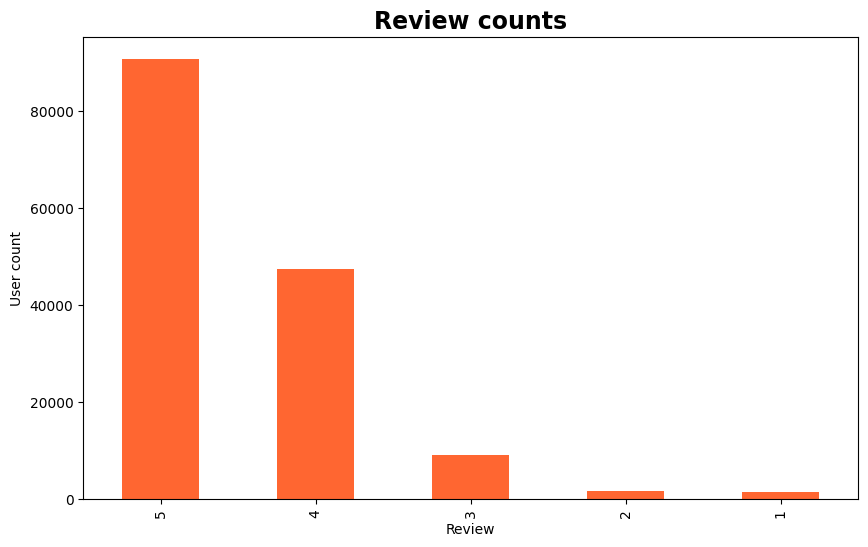

In [168]:
ratings.rating.apply(lambda x:int(np.ceil(x))).value_counts().plot.bar(figsize=(10,6),color='#FF6631')
plt.title("Review counts",fontweight='bold',fontsize=17)
plt.xlabel("Review")
plt.ylabel("User count")
plt.show()

In [203]:
X_train

,account_id,book_id
65103,10622,12551
139835,6157,32855
85020,122469,17021
90601,113593,19426
39108,72724,22379
...,...,...
119879,40023,39044
103694,125934,32897
131932,37525,28140
146867,42550,5611


In [226]:
import xgboost as xgb
model = xgb.XGBRanker(objective='rank:ndcg', n_estimators=2, random_state=0,learning_rate=0.1)
model.fit(
    X_train,
    y_train,
    group=[list(group_train)],
    eval_metric='ndcg',
    eval_set=[(X_test, y_test)],
    eval_group=[list(group_test)],
    verbose =True
)

# model.fit(ratings[['account_id','book_id']], ratings['rating'], group=ratings['count'].to_list(), verbose=True)

/home/abolfazl/.local/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-ndcg:0.98633
[1]	validation_0-ndcg:0.98674


XGBRanker(base_score=None, booster=None, callbacks=None, colsample_bylevel=None,
          colsample_bynode=None, colsample_bytree=None,
          early_stopping_rounds=None, enable_categorical=False,
          eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
          grow_policy=None, importance_type=None, interaction_constraints=None,
          learning_rate=0.1, max_bin=None, max_cat_threshold=None,
          max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
          max_leaves=None, min_child_weight=None, missing=nan,
          monotone_constraints=None, n_estimators=2, n_jobs=None,
          num_parallel_tree=None, objective='rank:ndcg', predictor=None, ...)

In [214]:
X_train.head(1)

,account_id,book_id
65103,10622,12551


In [232]:
model.predict(pd.DataFrame([[15548, 210099]], columns=['account_id', 'book_id']))

array([0.62036145], dtype=float32)

In [ ]:
15548	2199	3.625000	19

In [216]:
pd.DataFrame([[15548, 2199]], columns=['account_id', 'book_id'])

,account_id,book_id
0,15548,2199
